In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz

from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.gamma_ray_limits.compute_limits import get_detected_spectrum
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import energy_res_comptel, energy_res_fermi

import time

In [21]:
# vm = VectorMediator(mx=75., mv=1000., gvxx=1., gvuu=1., gvdd=0.2, gvss=0., gvee=0., gvmumu=0.)

s_theta = 0.5
# sm_hp = ScalarMediator(mx=133.8561909090909, ms=1000., gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta)
sm_hp = ScalarMediator(mx=135.69974343434345, ms=1000., gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta)

e_min, e_max = 0.3, 3000.0
e_cm = 2.*sm_hp.mx*(1.+0.5*1e-6)

spec_fn = lambda e_gams, e_cm: sm_hp.spectra(e_gams, e_cm)["total"]

In [22]:
start = time.time()

dnde_det = get_detected_spectrum(spec_fn, sm_hp.gamma_ray_lines, e_min, e_max, e_cm, energy_res_fermi)

end = time.time()
print("%f seconds" % (end - start))

0.161224 seconds


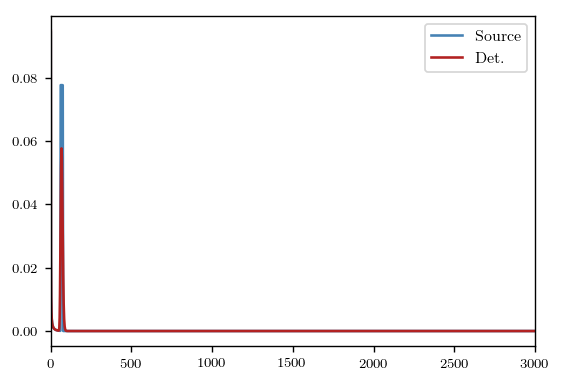

In [28]:
e_gams = np.logspace(np.log10(e_min), np.log10(e_max), 250)

plt.plot(e_gams, spec_fn(e_gams, e_cm), label="Source")
plt.plot(e_gams, dnde_det(e_gams), label="Det.")

# plt.xlabel(r"$E_\gamma$ (MeV)")
# plt.ylabel(r"$dN/dE_\gamma$ (MeV$^{-1}$)")
plt.xlim(e_min, e_max)
# plt.ylim(1e-7, 1e0)
plt.legend()

In [36]:
from scipy.optimize import minimize_scalar

In [49]:
minimize_scalar(lambda e: -e**2 * dnde_det(e), bounds=dnde_det.get_knots()[[0, -1]], method="bounded")

     fun: -527.5697707519251
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 68.96256481037355

In [45]:
dnde_det(67)

array(0.11279775)

In [1]:
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import energy_res_comptel, energy_res_e_astrogam
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import A_eff_comptel, A_eff_e_astrogam
import numpy as np

In [2]:
e_gams = np.logspace(-1, 3)

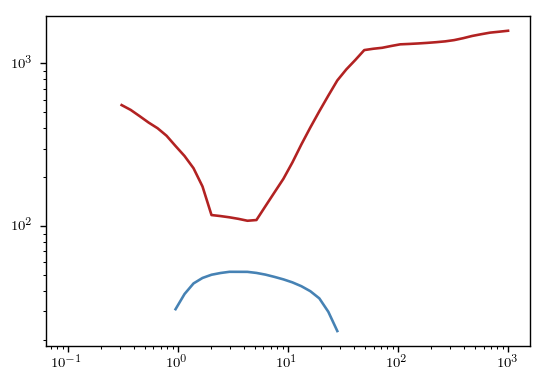

In [3]:
plt.loglog(e_gams, A_eff_comptel(e_gams))
plt.loglog(e_gams, A_eff_e_astrogam(e_gams))

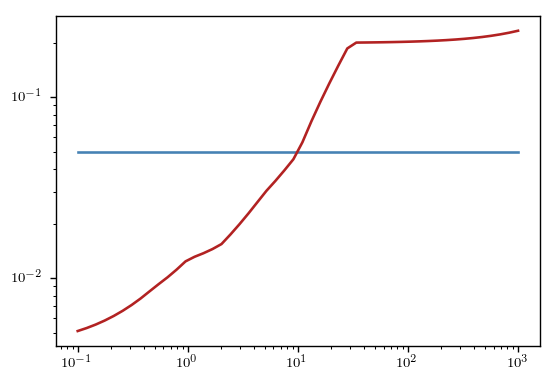

In [4]:
plt.loglog(e_gams, energy_res_comptel(e_gams))
plt.loglog(e_gams, energy_res_e_astrogam(e_gams))

In [5]:
energy_res_e_astrogam(e_gams)

array([ 5.00390257e-03,  5.21402150e-03,  5.46732414e-03,  5.77238786e-03,
        6.13922806e-03,  6.57931000e-03,  7.10533239e-03,  7.73055451e-03,
        8.46725098e-03,  9.32354447e-03,  1.02972743e-02,  1.13645093e-02,
        1.24584585e-02,  1.34451243e-02,  1.42214362e-02,  1.47897344e-02,
        1.53528986e-02,  1.63832743e-02,  1.81914262e-02,  2.10509271e-02,
        2.52335547e-02,  3.08990993e-02,  3.78492544e-02,  4.50181224e-02,
        4.94640081e-02,  4.44324228e-02,  1.57103944e-02, -6.51336514e-02,
       -2.53146113e-01, -6.52526854e-01, -1.45733863e+00, -3.02465534e+00,
       -6.00545547e+00, -1.15780728e+01, -2.18634499e+01, -4.06621829e+01,
       -7.47604230e+01, -1.36240368e+02, -2.46563350e+02, -4.43778496e+02,
       -7.95239508e+02, -1.42002371e+03, -2.52843453e+03, -4.49157421e+03,
       -7.96383249e+03, -1.40984729e+04, -2.49269818e+04, -4.40264381e+04,
       -7.76933854e+04, -1.37008325e+05])